# Heart Disease Prediction and analysis of Various Algorithms

## Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Reading Data

In [71]:
dataset = pd.read_csv("heart_cleveland_upload.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# EDA

0    160
1    137
Name: condition, dtype: int64


C:\Users\suyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


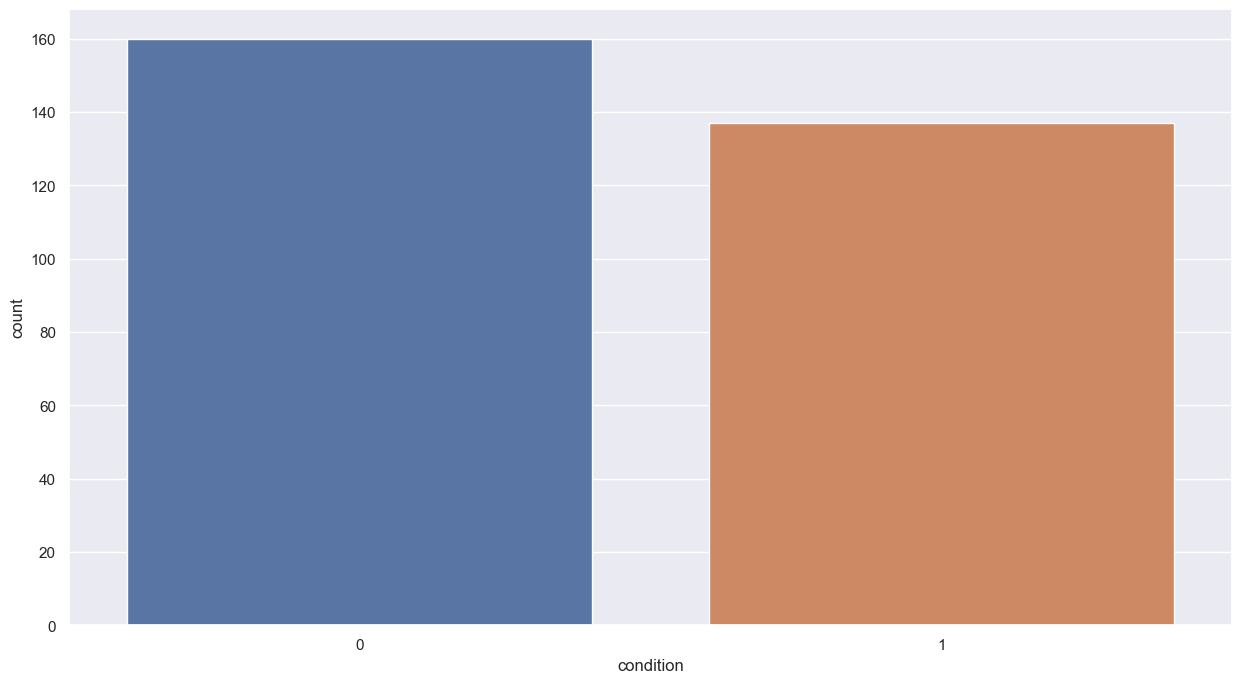

In [72]:
y = dataset["condition"]

sns.countplot(y)
target_temp = dataset.condition.value_counts()

print(target_temp)

## Analysing Feautre Chest Pain (cp)

In [73]:
dataset["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='condition'>

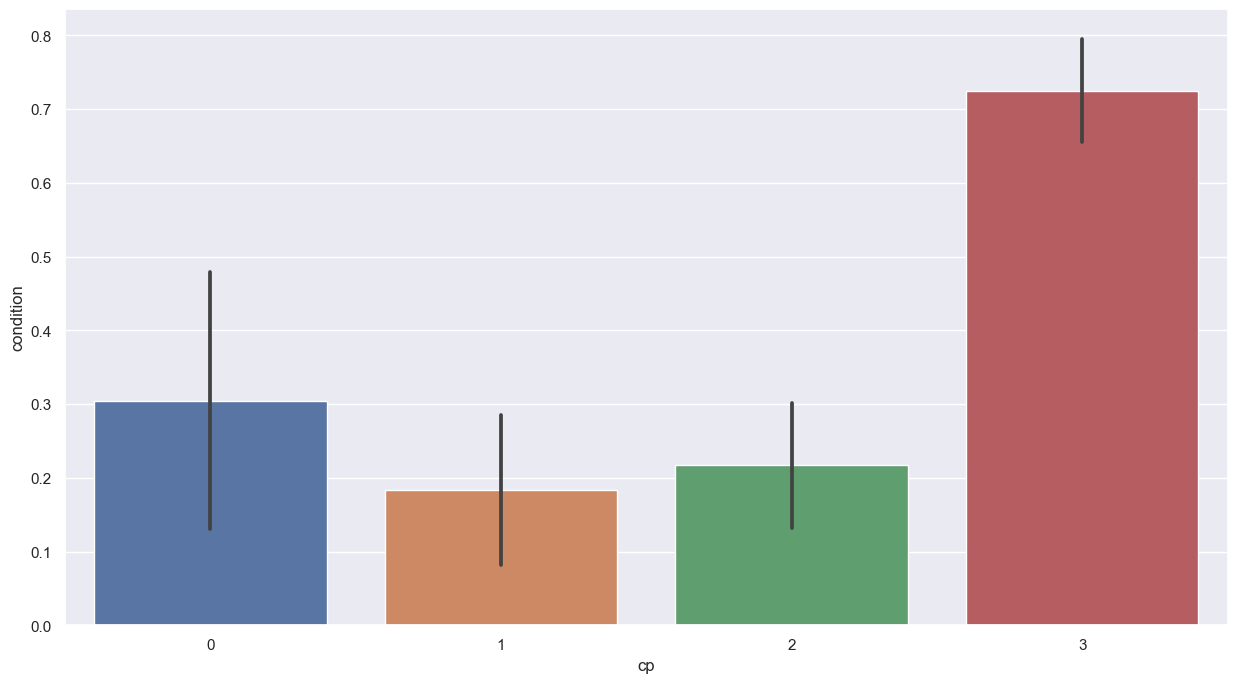

In [74]:
sns.barplot(dataset["cp"],y)

## Analysing feature sex

In [75]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='condition'>

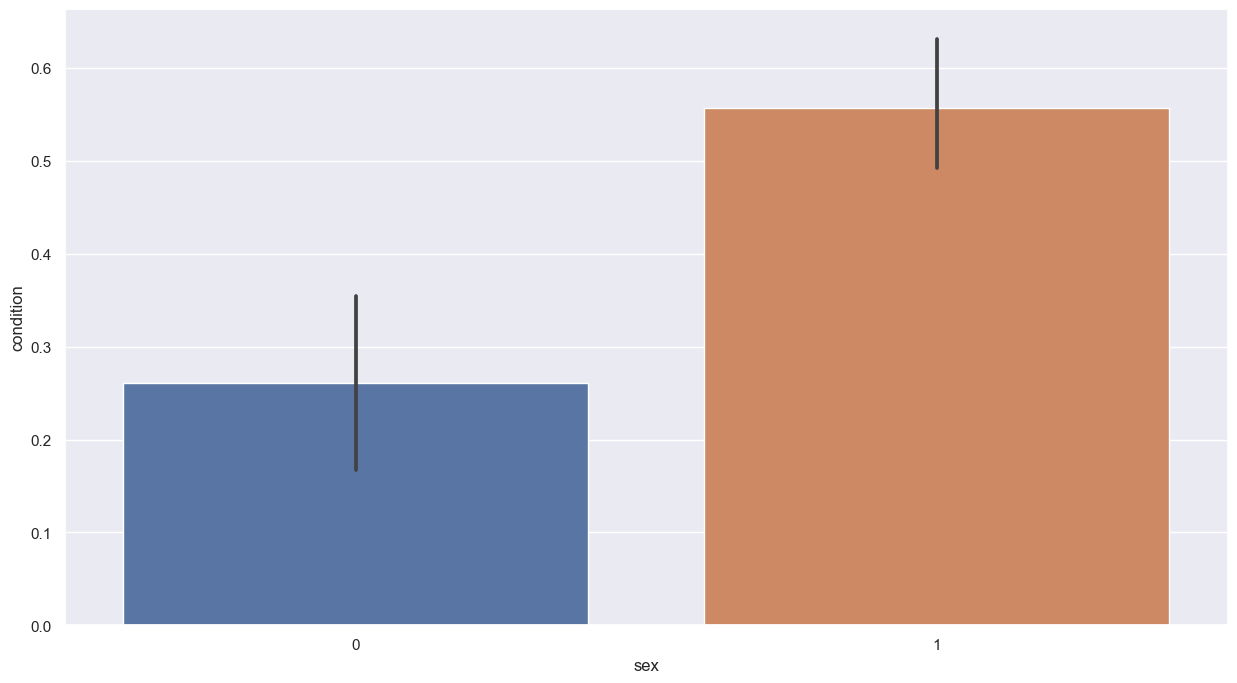

In [76]:
sns.barplot(dataset["sex"],y)

## Correlation

In [77]:
print(dataset.corr()["condition"].abs().sort_values())


fbs          0.003167
chol         0.080285
trestbps     0.153490
restecg      0.166343
age          0.227075
sex          0.278467
slope        0.333049
cp           0.408945
exang        0.421355
thalach      0.423817
oldpeak      0.424052
ca           0.463189
thal         0.520516
condition    1.000000
Name: condition, dtype: float64


## Removing less correlated features

In [78]:
dataset.pop("restecg")
dataset.pop("trestbps")
dataset.pop("fbs")
dataset.pop("chol")
dataset.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,131,0,0.1,1,1,0,0
1,69,0,0,151,0,1.8,0,2,0,0
2,66,0,0,114,0,2.6,2,0,0,0
3,65,1,0,174,0,1.4,1,1,0,1
4,64,1,0,144,1,1.8,1,0,0,0


## Dataset Split

In [79]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("condition",axis=1)
target = dataset["condition"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## MODEL - Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
acc=model.score(X_test, Y_test)
print(acc)
score_nb = acc*100

0.85


## MODEL - KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

modelKnn = KNeighborsClassifier(n_neighbors=8)

modelKnn.fit(X_train, Y_train)

acc=modelKnn.score(X_test, Y_test)
print(acc)
score_knn = acc*100

0.6166666666666667


C:\Users\suyas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## MODEL - Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(X_train, Y_train)

acc=modelLR.score(X_test, Y_test)
print(acc)
score_lr = acc*100

0.8333333333333334


C:\Users\suyas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## MODEL - SVM

In [83]:
from sklearn.svm import SVC

modelSVM = SVC(kernel='linear', C=1)

modelSVM.fit(X_train, Y_train)

acc=modelSVM.score(X_test, Y_test)
print(acc)
score_svm = acc*100

0.8166666666666667


## MODEL - Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train,Y_train)

acc=rf.score(X_test, Y_test)
print(acc)

score_rf = acc*100

0.7666666666666667


## MODEL - Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,Y_train)

acc=dt.score(X_test, Y_test)
print(acc)

score_dt = acc*100

0.6833333333333333


## Model - AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=50)

ab.fit(X_train,Y_train)

acc=ab.score(X_test, Y_test)
print(acc)

score_ab = acc*100

0.8166666666666667


# Comparision

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

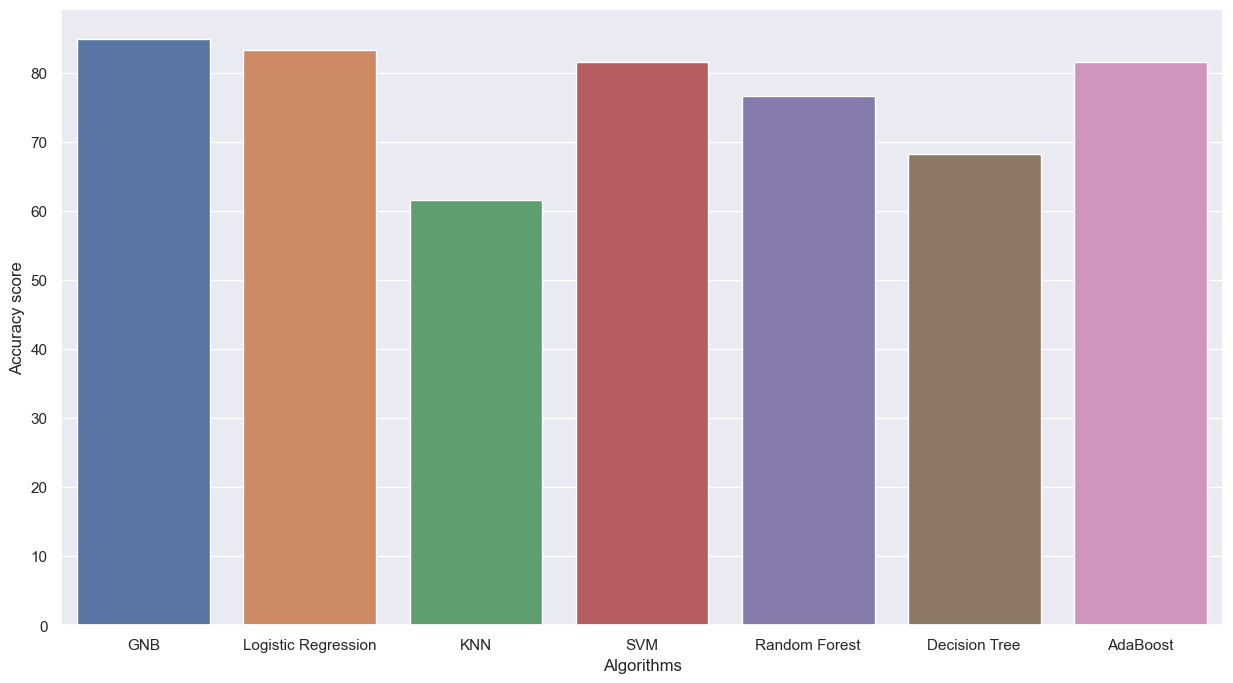

In [87]:
scores = [score_nb, score_lr,score_knn, score_svm, score_rf, score_dt, score_ab]

algos = ["GNB", "Logistic Regression", "KNN", "SVM", "Random Forest", "Decision Tree", "AdaBoost"]

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algos,scores)

# APP

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from tkinter import filedialog
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



# Define the GUI
root = tk.Tk()
root.title('K-NN Classifier')
# root.attributes('-fullscreen', True)

# text
lab = tk.Label(root, text = 'Select the Algorithm and enter the data: ')
lab.pack(pady = 20)

# Add algorithm selection menu
alg_var = tk.StringVar(value='random_forest')
alg_label = tk.Label(root, text='Select algorithm:')
alg_label.pack(side=tk.LEFT)
alg_menu = tk.OptionMenu(root, alg_var, 'knn', 'random_forest', 'svm', 'naive_bayes', 'adaboost', 'logistic_regression', 'decision_tree')
alg_menu.pack(side=tk.LEFT)

# Load the dataset
# messagebox.showinfo("Dataset Selection", "Select the dataset file")
# filename = filedialog.askopenfilename()
data = dataset

# Split the data into features and target variable
a = 'condition'
X = data.drop(a, axis=1)
y = data[a]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Add input fields
input_labels = []
input_entries = []
for i, feature in enumerate(X.columns):
    label = tk.Label(root, text=feature)
    label.pack()

    input_labels.append(label)
    entry = tk.Entry(root)
    entry.pack()

    input_entries.append(entry)





# Define predict function

def predict():
    try:
        # Get inputs from GUI
        inputs = [float(entry.get()) for entry in input_entries]
        # Get selected algorithm
        algorithm = alg_var.get()
        
        if algorithm == 'knn':
            # Train the KNN model
            model = KNeighborsClassifier(n_neighbors=10)

        elif algorithm == 'random_forest':
            # Train the Random Forest model
            model = RandomForestClassifier(n_estimators=10)

        elif algorithm == 'svm':
            # Train the SVM model
            model = SVC(kernel='rbf', C=1)

        elif algorithm == 'naive_bayes':
            # Train the Naive Bayes model
            model = GaussianNB()

        elif algorithm == 'adaboost':
            # Train the Adaboost model
            model = AdaBoostClassifier(n_estimators=50)

        elif algorithm == 'logistic_regression':
            # Train the Logistic Regression model
            model = LogisticRegression()
            
        elif algorithm == 'decision_tree':
            # Train the Decision Tree model
            model = DecisionTreeClassifier()
            
            
            
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        accuracy_value.config(text=accuracy)
        # Make a prediction
        prediction = model.predict([inputs])[0]
        # Update output field
        output_value.config(text=prediction)
        # Show success message
        if prediction==1:
            messagebox.showinfo('Prediction successful', 'Heart Disease!! Consult Medical Advice')
        else:
            messagebox.showinfo('Prediction successful','You are Healthy!!')
    except Exception as e:
        messagebox.showerror('Error', str(e))

# Add predict button
predict_button = tk.Button(root, text='Predict', command=predict)
predict_button.pack(pady = 30)

# Add output field
output_label = tk.Label(root, text='Prediction:')
output_label.pack()

output_value = tk.Label(root, text='')
output_value.pack()

# Accuracy
accuracy_label = tk.Label(root, text='Accuracy:')
accuracy_label.pack(pady = 20)
accuracy_value = tk.Label(root, text='')
accuracy_value.pack()



# Start GUI loop
root.mainloop()